In [1]:
from experiment import Experiment
%matplotlib inline

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
var_dict = dict(
    numerical_vars = ['age', 'fnlwgt', 'education-num', 'hours-per-week',
                      'capital-gain' ,'capital-loss'],
    categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'native-country'],
    class_var = 'class'
)

In [3]:
exp = Experiment('data/adult.csv', 
                 var_dict,
                 embedding_dim=32,
                 lr=0.2,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=[3, 5, 10],
                 n_init_bins_list=[5, 10, 15])

In [25]:
exp.data.shape

(48842, 15)

In [4]:
list_of_scores = exp.perform_exp()

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid v

84.38981580734253 training start
>>> Epoch = 1
Loss = 0.7715517282485962
[2, 3, 3, 3, 2, 2] 0.406997013399
>>> Epoch = 2
Loss = 0.7561208009719849
[2, 2, 2, 3, 2, 2] 0.397030443679
>>> Epoch = 3
Loss = 0.7348151206970215
[2, 2, 2, 3, 2, 2] 0.417871190725
>>> Epoch = 4
Loss = 0.681002676486969
[2, 2, 4, 3, 2, 2] 0.42423222292
>>> Epoch = 5
Loss = 0.667072594165802
[3, 2, 3, 3, 2, 2] 0.396227304302
>>> Epoch = 6
Loss = 0.769533634185791
[2, 2, 3, 2, 2, 2] 0.388556000275
>>> Epoch = 7
Loss = 0.696946382522583
[2, 2, 2, 3, 2, 2] 0.345830359613
>>> Epoch = 8
Loss = 0.7382877469062805
[3, 2, 2, 3, 2, 2] 0.387134700965
>>> Epoch = 9
Loss = 0.7011669874191284
[2, 2, 2, 3, 2, 2] 0.342885685356
>>> Epoch = 10
Loss = 0.7014093399047852
[2, 2, 2, 3, 2, 2] 0.340574913632
>>> Epoch = 11
Loss = 0.7263168096542358
[2, 2, 2, 3, 2, 2] 0.339672742818
>>> Epoch = 12
Loss = 0.7089323401451111
[2, 2, 2, 3, 2, 2] 0.340092287671
>>> Epoch = 13
Loss = 0.7190151214599609
[2, 2, 2, 3, 2, 2] 0.337467182472
>>> Ep

>>> Epoch = 10
Loss = 0.8013584613800049
[2, 2, 3, 2, 2, 2] 0.46143508335
>>> Epoch = 11
Loss = 0.8114231824874878
[2, 2, 3, 2, 2, 2] 0.464366153709
>>> Epoch = 12
Loss = 0.8031153678894043
[2, 2, 3, 2, 2, 2] 0.463536768394
>>> Epoch = 13
Loss = 0.7946768999099731
[2, 2, 3, 2, 2, 2] 0.46356218528
>>> Epoch = 14
Loss = 0.818234920501709
[2, 2, 3, 2, 2, 2] 0.460622401571
>>> Epoch = 15
Loss = 0.8155009746551514
[2, 2, 3, 2, 2, 2] 0.462337261716
>>> Epoch = 16
Loss = 0.7947432994842529
[2, 2, 3, 2, 2, 2] 0.461950775966
>>> Epoch = 17
Loss = 0.826941728591919
[2, 2, 3, 2, 2, 2] 0.462819256488
>>> Epoch = 18
Loss = 0.7342528700828552
[2, 2, 3, 2, 2, 2] 0.461370219169
>>> Epoch = 19
Loss = 0.7759122848510742
[2, 2, 3, 2, 2, 2] 0.464532398312
>>> Epoch = 20
Loss = 0.809249222278595
[2, 2, 3, 2, 2, 2] 0.465148597564
>>> Epoch = 21
Loss = 0.7640445828437805
[2, 2, 3, 2, 2, 2] 0.466255227023
>>> Epoch = 22
Loss = 0.7617669105529785
[2, 2, 3, 2, 2, 2] 0.467712802775
>>> Epoch = 23
Loss = 0.754259

>>> Epoch = 20
Loss = 0.8634571433067322
[2, 2, 4, 2, 2, 2] 0.428067845421
>>> Epoch = 21
Loss = 0.8238570690155029
[2, 2, 4, 2, 2, 2] 0.432841269713
>>> Epoch = 22
Loss = 0.8173231482505798
[2, 2, 4, 2, 2, 2] 0.432506147995
>>> Epoch = 23
Loss = 0.8047029972076416
[2, 2, 4, 2, 2, 2] 0.434774332722
>>> Epoch = 24
Loss = 0.777083694934845
[2, 4, 4, 2, 2, 2] 0.434479157934
>>> Epoch = 25
Loss = 0.8592856526374817
[2, 2, 4, 2, 2, 2] 0.431979759799
>>> Epoch = 26
Loss = 0.8569684028625488
[2, 2, 4, 2, 2, 2] 0.434026382339
>>> Epoch = 27
Loss = 0.7955319285392761
[2, 4, 4, 2, 2, 2] 0.434271551586
>>> Epoch = 28
Loss = 0.8277888298034668
[2, 4, 4, 2, 2, 2] 0.430267109119
>>> Epoch = 29
Loss = 0.903877317905426
[2, 4, 4, 2, 2, 2] 0.428512733401
>>> Epoch = 30
Loss = 0.7733420133590698
[2, 4, 4, 2, 2, 2] 0.43232947465
>>> Epoch = 31
Loss = 0.8399149775505066
[2, 4, 4, 2, 2, 2] 0.432134646806
>>> Epoch = 32
Loss = 0.8246480822563171
[2, 4, 4, 2, 2, 2] 0.433402509607
>>> Epoch = 33
Loss = 0.8124

In [5]:
exp.semantic_binning.bins_by_var

{'age': {'bins': ['(16.999, 38.0]', '(38.0, 90.0]'],
  'split_point': [16.999, 38.0, 90.0]},
 'capital-gain': {'bins': ['(-0.001, 5013.0]', '(5013.0, 99999.0]'],
  'split_point': [-0.001, 5013.0, 99999.0]},
 'capital-loss': {'bins': ['(-0.001, 1721.0]', '(1721.0, 4356.0]'],
  'split_point': [-0.001, 1721.0, 4356.0]},
 'education-num': {'bins': ['(0.999, 7.0]', '(7.0, 11.0]', '(11.0, 16.0]'],
  'split_point': [0.999, 7.0, 11.0, 16.0]},
 'fnlwgt': {'bins': ['(12284.999, 83792.2]',
   '(83792.2, 121287.0]',
   '(121287.0, 196308.0]',
   '(196308.0, 1490400.0]'],
  'split_point': [12284.999, 83792.2, 121287.0, 196308.0, 1490400.0]},
 'hours-per-week': {'bins': ['(0.999, 35.0]', '(35.0, 99.0]'],
  'split_point': [0.999, 35.0, 99.0]}}

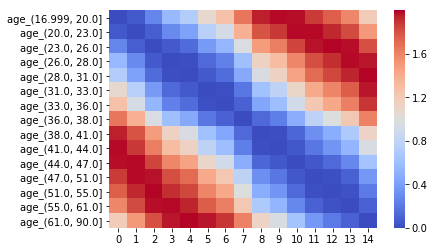

In [6]:
exp.semantic_binning.plot_pairwise_distance_between_bins('age')

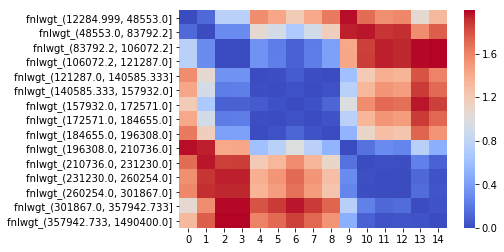

In [7]:
exp.semantic_binning.plot_pairwise_distance_between_bins('fnlwgt')

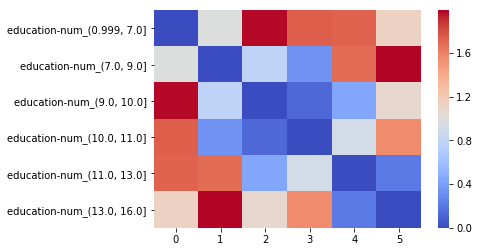

In [8]:
exp.semantic_binning.plot_pairwise_distance_between_bins('education-num')

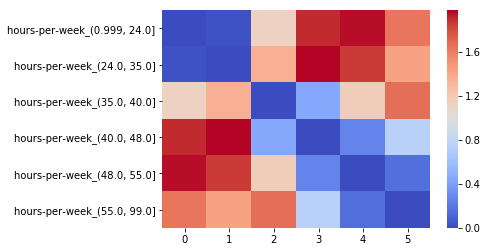

In [9]:
exp.semantic_binning.plot_pairwise_distance_between_bins('hours-per-week')

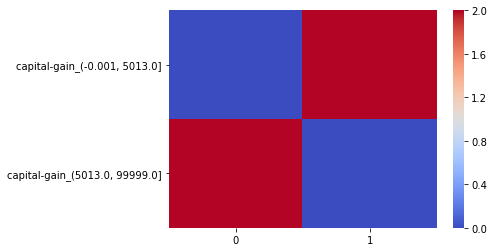

In [10]:
exp.semantic_binning.plot_pairwise_distance_between_bins('capital-gain')

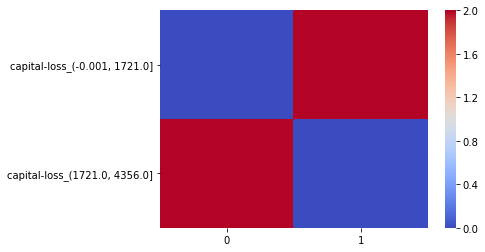

In [11]:
exp.semantic_binning.plot_pairwise_distance_between_bins('capital-loss')

In [15]:
result = exp.print_scores(list_of_scores)

In [16]:
result.sort_values(by='lr_acc_C=0.5', ascending=False)

,disc_method,dt_acc_depth=2,dt_acc_depth=3,dt_acc_depth=4,dt_acc_depth=5,dt_acc_depth=6,kmeans_nmi,lr_acc_C=0.1,lr_acc_C=0.3,lr_acc_C=0.5,lr_acc_C=1.0,lr_acc_C=3.0,n_disc_cols,nb_acc,rf_acc_n_est=10,rf_acc_n_est=20,rf_acc_n_est=30,rf_acc_n_est=5
9,ef_10,0.535,0.549,0.560,0.560,0.563,0.069810,0.572,0.572,0.572,0.571,0.571,36,0.539,0.505,0.514,0.518,0.489
5,ef_3,0.550,0.558,0.560,0.561,0.562,0.079544,0.571,0.571,0.571,0.571,0.570,19,0.540,0.502,0.505,0.510,0.493
7,ef_5,0.535,0.549,0.560,0.560,0.563,0.073700,0.571,0.571,0.571,0.571,0.571,26,0.539,0.501,0.505,0.508,0.487
1,sb_5,0.551,0.560,0.563,0.564,0.564,0.091475,0.570,0.570,0.570,0.570,0.570,14,0.540,0.504,0.509,0.511,0.496
3,sb_15,0.551,0.560,0.560,0.564,0.564,0.100786,0.570,0.570,0.570,0.569,0.569,15,0.541,0.505,0.510,0.512,0.497
2,sb_10,0.551,0.560,0.560,0.561,0.564,0.087218,0.570,0.570,0.569,0.569,0.569,13,0.539,0.514,0.517,0.518,0.505
0,raw,0.552,0.562,0.563,0.567,0.569,0.092774,0.566,0.566,0.566,0.566,0.566,6,0.506,0.514,0.519,0.521,0.493
8,ew_10,0.528,0.544,0.551,0.553,0.556,0.069661,0.566,0.566,0.566,0.566,0.566,60,0.533,0.497,0.503,0.508,0.486
6,ew_5,0.527,0.548,0.548,0.552,0.555,0.082174,0.561,0.562,0.561,0.561,0.561,30,0.529,0.505,0.507,0.509,0.498
4,ew_3,0.546,0.547,0.548,0.548,0.550,0.091706,0.559,0.559,0.559,0.559,0.559,18,0.524,0.506,0.511,0.513,0.500


In [23]:
from matplotlib import pyplot as plt

def plot_model_comparison_chart(result):
    
    def get_marker_colors(disc_method_list):
        colors = []
        for method in disc_method_list:
            if 'sb' in method:
                colors.append('r')
            if 'ew' in method:
                colors.append('b')
            if 'ef' in method:
                colors.append('g')
        return colors
        
    def get_rel_n_cols(result):
        n_cols = result['n_disc_cols']
        max_n_cols = n_cols.max()
        rel_n_cols = [(x / max_n_cols) for x in n_cols]
        return rel_n_cols
    
    def get_rel_acc(model_name, result):
        if model_name == 'DT':
            acc = result['dt_acc_depth=3']
        if model_name == 'LR':
            acc = result['lr_acc_C=1.0']
        if model_name == 'NB':
            acc = result['nb_acc']
        if model_name == 'RF':
            acc = result['rf_acc_n_est=20']
        if model_name == 'K-means':
            acc = result['kmeans_nmi']
        max_acc = acc.max()
        rel_acc = [(x / max_acc) for x in acc]
        return acc
    
    def make_plot_for_model(model_name, disc_method, rel_acc, rel_n_cols, loc, fig):        
        ax = fig.add_subplot(loc)
        ax.scatter(x=rel_n_cols, y=rel_acc, s=200, c=get_marker_colors(disc_method))
        for i, xy in enumerate(zip(rel_n_cols, rel_acc)):
            ax.annotate(disc_method[i], xy, fontsize=15)
        ax.set_title(model_name, fontsize=25)
        ax.set_xlabel('Relative Number of Columns', fontsize=25)
        if model_name == 'K-means':
            ax.set_ylabel('NMI', fontsize=20)        
        else:
            ax.set_ylabel('Accuracy', fontsize=20)        
        
    result = result.loc[result['disc_method'] != 'raw'].reset_index(drop=True)
    disc_method = result['disc_method']
    rel_n_cols = get_rel_n_cols(result)
    
    fig = plt.figure(figsize=(20,20))
    for model_name, loc in zip(['DT','LR','NB','K-means'], [221,222,223,224]):
        rel_acc = get_rel_acc(model_name, result)
        make_plot_for_model(model_name, disc_method, rel_acc, rel_n_cols, loc, fig)

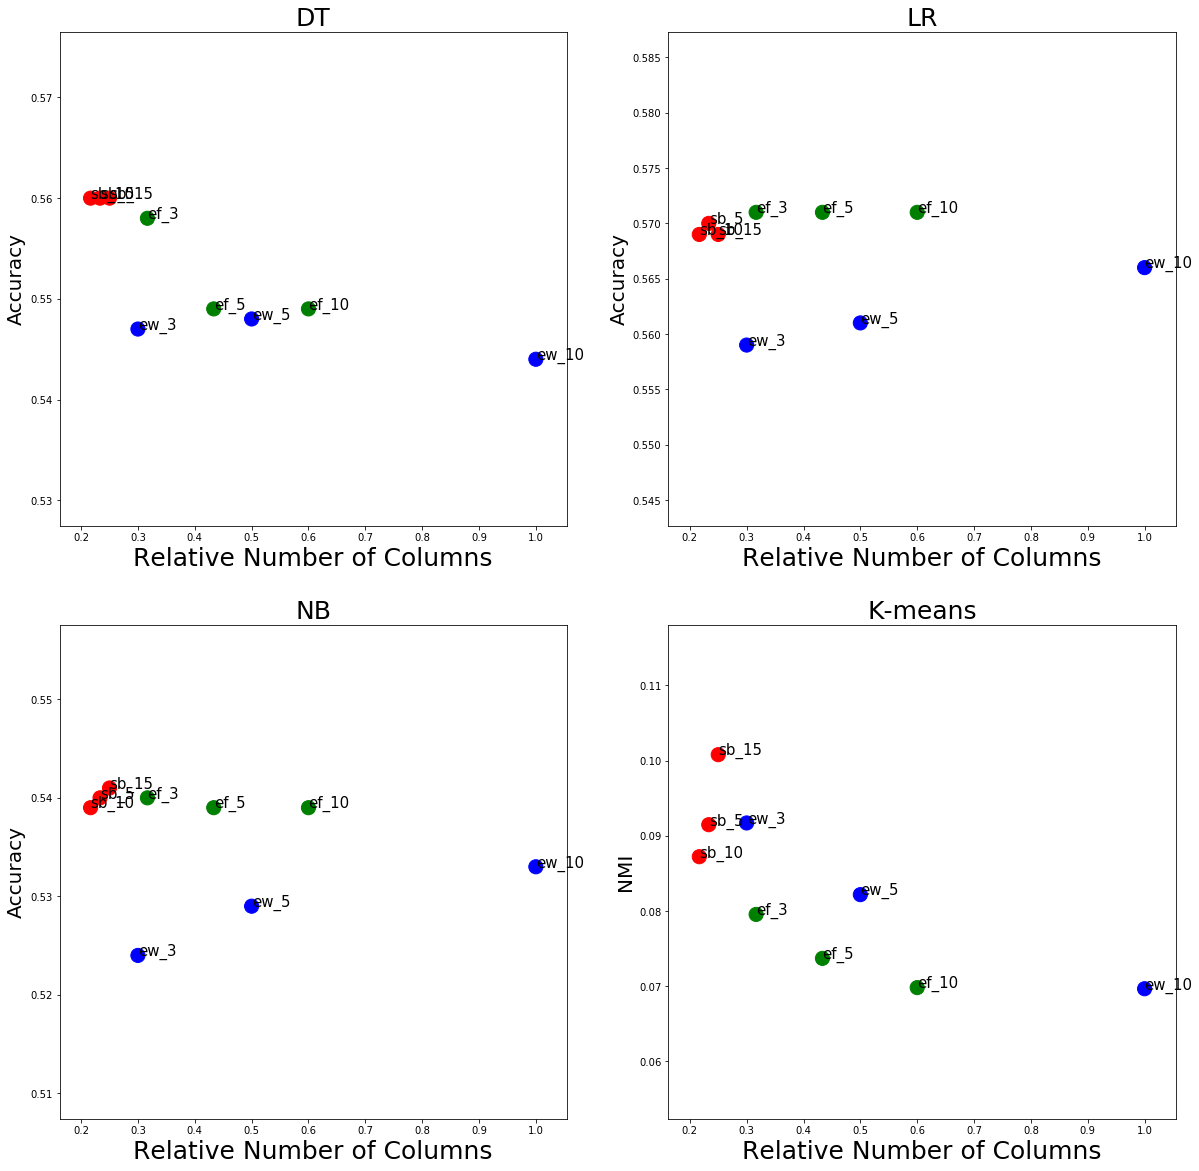

In [24]:
plot_model_comparison_chart(result)